In [1]:
from google.cloud import storage
import tempfile
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [24]:
BUCKET_NAME = 'srgan-wagon-project'
STORAGE_LOCATION = 'datasets/kaggle100-original/LR'

In [25]:
def get_images_gcp(n, storage_location):

    client = storage.Client()

    bucket = client.bucket(BUCKET_NAME)

    blobs = bucket.list_blobs(prefix=storage_location)
    images = []

    for idx, blob in enumerate(blobs):
        if idx >= n:
            continue
        _, temp_local_filename = tempfile.mkstemp()

        # Download file from bucket.
        blob.download_to_filename(temp_local_filename)
        img = cv2.imread(temp_local_filename)
        images.append(img)
        os.remove(temp_local_filename)
    return np.array(images)

In [26]:
images=get_images_gcp(n=20, storage_location=STORAGE_LOCATION)

In [27]:
images.shape

(20, 96, 96, 3)

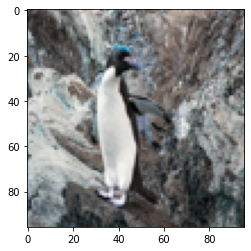

In [28]:
plt.imshow(images[0]);